In [1]:
api_token = {"username":"llpatzi","key":"d11b4f8a180ee2d0b3436fca8e47b74e"}

In [2]:
!rm -rf /root/.kaggle.

In [3]:
!mkdir /root/.kaggle

In [4]:
import json
with open ('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d dsilverus/basededatosmie820

 91% 61.0M/67.2M [00:00<00:00, 115MB/s]
100% 67.2M/67.2M [00:00<00:00, 111MB/s]


In [7]:
import zipfile
archivo_zip= '/content/basededatosmie820.zip'
archivo_test='/content/images_test.zip'

In [9]:
Mi_archivo_zip = zipfile.ZipFile(archivo_zip, "r")
Mi_archivo_zip.extractall()

#Mi_archivo_test = zipfile.ZipFile(archivo_test, "r")
#Mi_archivo_test.extractall()

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np

from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/Rostros',
    validation_split=0.5,
    subset="training",
    seed=123,
    image_size=(100,100))

Found 5000 files belonging to 2 classes.
Using 2500 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Rostros',
  validation_split=0.5,
  subset="validation",
  seed=200,
  image_size=(100,100))

Found 5000 files belonging to 2 classes.
Using 2500 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['ConMascarilla', 'SinMascarilla']


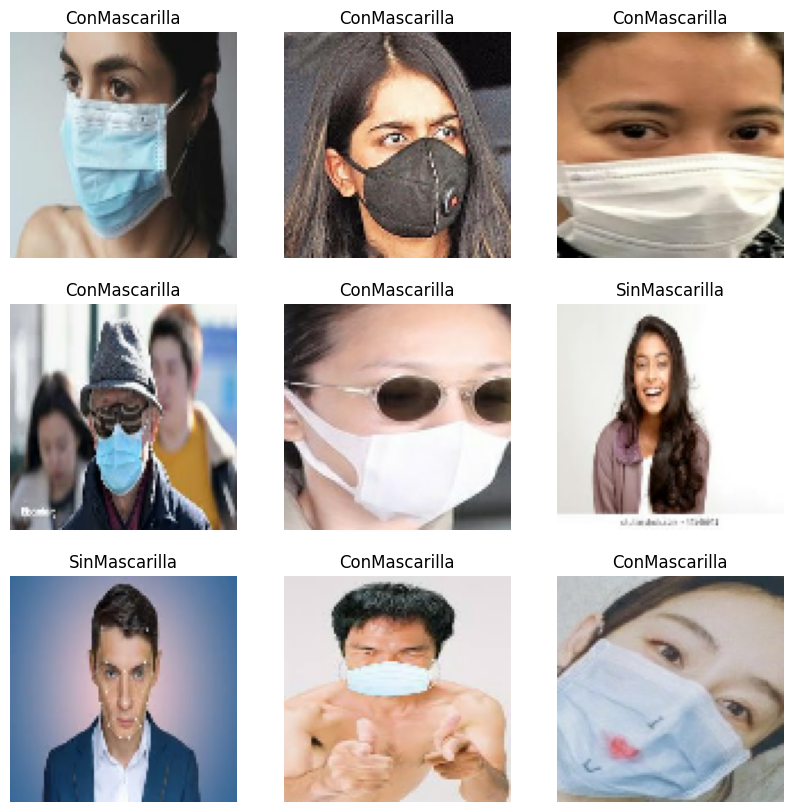

In [14]:
import matplotlib.pyplot as plt # Importar la librería de matplolib para gráficas
import cv2

def convert_to_grayscale(image):
    return tf.image.rgb_to_grayscale(image)

# Crear el conjunto de datos de imágenes en escala de grises
train_ds_gray = train_ds.map(lambda x, y: (convert_to_grayscale(x), y))
val_ds_gray = val_ds.map(lambda x, y: (convert_to_grayscale(x), y))

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):

  for i in range(9):

    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"),cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
num_classes = len(class_names)
model = tf.keras.models.Sequential([
  layers.Rescaling(1./255, input_shape=(100, 100, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)        1

In [19]:
#entrenar el modelo
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
79/79 [==============================] - 49s 599ms/step - loss: 0.4542 - accuracy: 0.7720 - val_loss: 0.2631 - val_accuracy: 0.8992
Epoch 2/10
79/79 [==============================] - 43s 539ms/step - loss: 0.2521 - accuracy: 0.9028 - val_loss: 0.1920 - val_accuracy: 0.9252
Epoch 3/10
79/79 [==============================] - 41s 524ms/step - loss: 0.1922 - accuracy: 0.9260 - val_loss: 0.1763 - val_accuracy: 0.9340
Epoch 4/10
79/79 [==============================] - 41s 514ms/step - loss: 0.1674 - accuracy: 0.9356 - val_loss: 0.1533 - val_accuracy: 0.9420
Epoch 5/10
79/79 [==============================] - 41s 523ms/step - loss: 0.1319 - accuracy: 0.9528 - val_loss: 0.1732 - val_accuracy: 0.9308
Epoch 6/10
79/79 [==============================] - 42s 537ms/step - loss: 0.1092 - accuracy: 0.9604 - val_loss: 0.1069 - val_accuracy: 0.9660
Epoch 7/10
79/79 [==============================] - 42s 524ms/step - loss: 0.0809 - accuracy: 0.9708 - val_loss: 0.1010 - val_accuracy: 0.9644

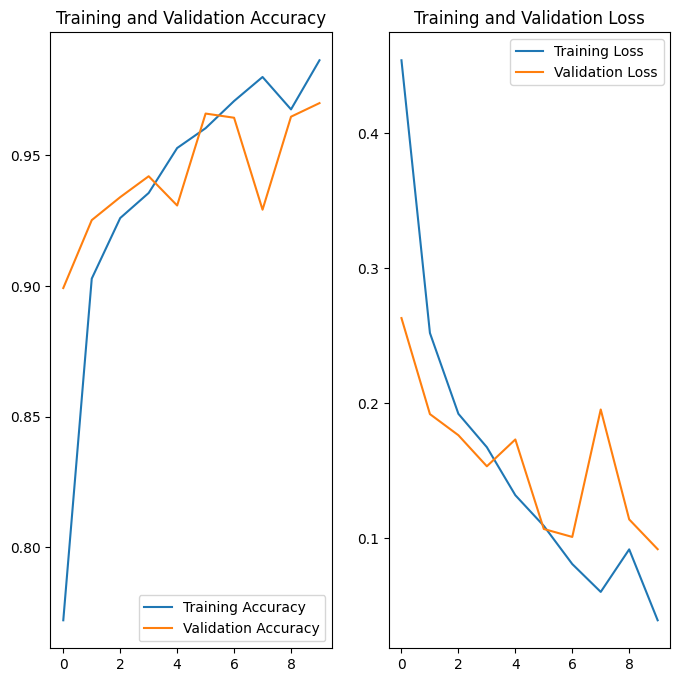

In [20]:
#graficar resultados:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
model.evaluate(val_ds,return_dict=True)

79/79 [==============================] - 11s 132ms/step - loss: 0.0919 - accuracy: 0.9700


{'loss': 0.09187432378530502, 'accuracy': 0.9700000286102295}